In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# ***DATA LOADING***

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train.isnull().sum()
test.isnull().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
train.duplicated().sum()
test.duplicated().sum()

np.int64(0)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10000 non-null  int64  
 1   CustomerId       10000 non-null  float64
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  float64
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10000 non-null  float64
 12  EstimatedSalary  10000 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1015.8+ KB


In [ ]:
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000
mean,7499.500000,1.571130e+07,657.893133,37.741733,5.047933,43591.901650,1.589600,0.786400,0.490133,1.191118e+05,0.203733
std,4330.271354,1.624016e+06,72.885701,8.182153,2.803621,60321.501907,0.530902,0.409861,0.499919,1.445556e+05,0.402786
min,0.000000,1.556581e+07,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.158000e+01,0.000000
25%,3749.750000,1.563460e+07,602.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,8.281985e+04,0.000000
50%,7499.500000,1.568995e+07,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,1.238663e+05,0.000000
75%,11249.250000,1.575804e+07,708.000000,42.000000,8.000000,111359.550000,2.000000,1.000000,1.000000,1.567019e+05,0.000000
max,14999.000000,1.565180e+08,850.000000,74.000000,10.000000,187911.550000,4.000000,1.000000,1.000000,1.575493e+07,1.000000


In [ ]:
int_cols = ['Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','CustomerId']

for col in int_cols:
    train[col] = train[col].astype(int)
    test[col] = test[col].astype(int)

In [ ]:
train['Exited']= train['Exited'].astype(int)

In [ ]:
train= train.drop(['id', 'CustomerId', 'Surname'], axis =1)
test = test.drop(['id', 'CustomerId', 'Surname'], axis =1)


# ***Graph and data analysis***

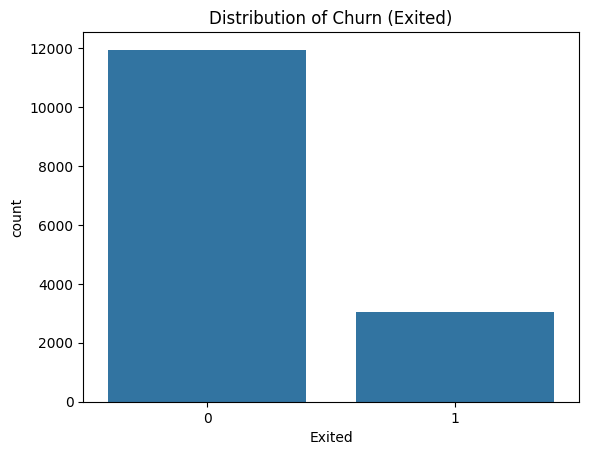

In [ ]:
sns.countplot(x='Exited', data=train)
plt.title('Distribution of Churn (Exited)')
plt.show()

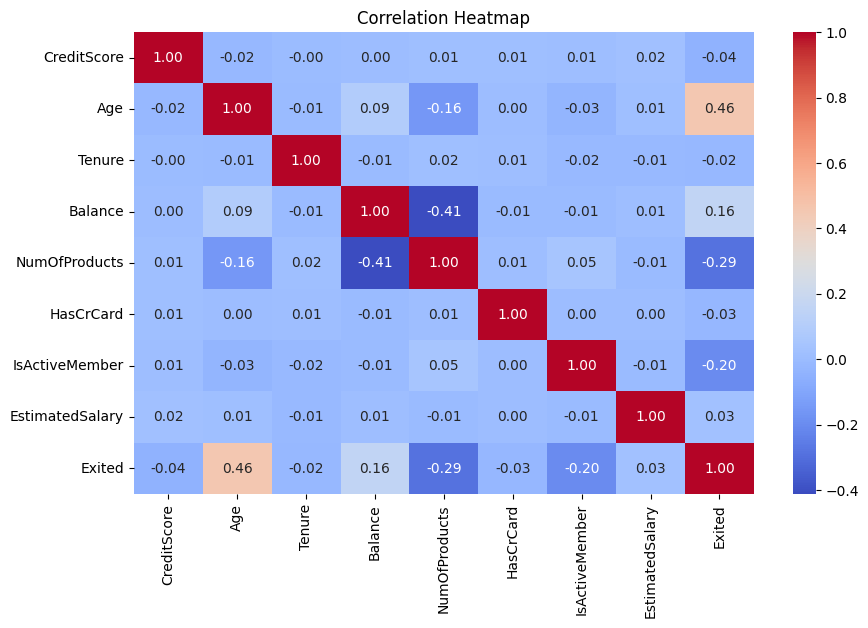

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

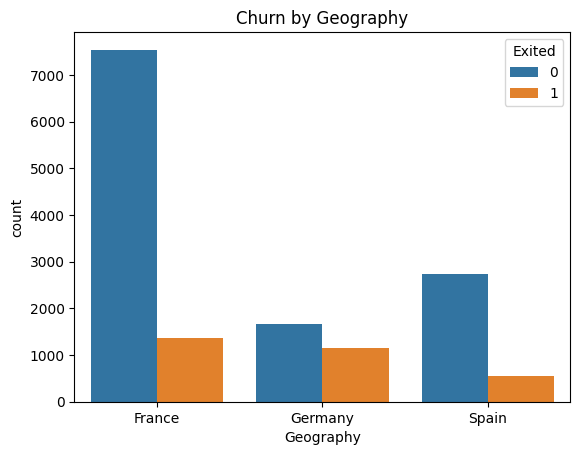

In [ ]:
sns.countplot(x='Geography', hue='Exited', data=train)
plt.title('Churn by Geography')
plt.show()

# Encoding


In [ ]:
cat_cols = ['Geography', 'Gender']


In [ ]:
train_encoded =  pd.get_dummies(train, columns=cat_cols, drop_first = True)
test_encoded = pd.get_dummies(test, columns=cat_cols, drop_first = True)


In [ ]:
test_encoded = test_encoded.reindex(columns = train_encoded.drop('Exited', axis=1).columns, fill_value=0)

In [ ]:
print("New columns after encoding:", train_encoded.columns.tolist())

New columns after encoding: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']


In [ ]:
train_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,652.0,31,9,129901.21,1,0,0,120531.31,0,False,False,True
1,812.0,38,5,0.00,2,1,1,185547.74,0,False,False,True
2,710.0,23,1,121376.15,1,1,1,57589.29,0,True,False,False
3,558.0,36,10,0.00,2,1,1,126192.54,0,False,True,False
4,625.0,39,4,137592.41,1,1,0,76946.60,1,True,False,True


In [ ]:
train_encoded.to_csv('train_encoded.csv', index=False)
test_encoded.to_csv('test_encoded.csv', index=False)

# FEATURE SCALING

ALWAYS SPLIT FIRST THEN SCALE


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
train_encoded = pd.read_csv('train_encoded.csv')
test_encoded = pd.read_csv('test_encoded.csv')

In [ ]:
X = train_encoded.drop('Exited', axis=1)
y = train_encoded['Exited']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_encoded)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid_rf= {
    'n_estimators':[100,200,300,400] ,
    'max_depth':[6,9,11,None],
    'min_samples_split':[4,7,10],
    'max_features': ['sqrt', 'log2']

   }
rf_base = RandomForestClassifier(random_state=2025, class_weight='balanced')
# grid_search = GridSearchCV(estimator=rf_base, param_grid= param_grid_rf , cv=5, n_jobs=-1,verbose =2, scoring='accuracy')
random_search = RandomizedSearchCV(estimator=rf_base,
                                   param_distributions=param_grid_rf,
                                   n_iter=20,
                                   cv=5,
                                   scoring='accuracy',
                                   random_state=42, # For reproducibility
                                   n_jobs=-1,
                                   verbose=2)

In [ ]:
print("Starting Randomized Search...")
random_search.fit(X_train_scaled, y_train)
print("\nBest Parameters found: ", random_search.best_params_)
print("Best Cross-Validation Score: {:.4f}".format(random_search.best_score_))

Starting Randomized Search...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters found:  {'n_estimators': 200, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': None}
Best Cross-Validation Score: 0.8911


In [ ]:
best_rf_model = random_search.best_estimator_
y_val_pred = best_rf_model.predict(X_val_scaled)
print("\nValidation Accuracy with Best Model:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


Validation Accuracy with Best Model: 0.8923333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      2389
           1       0.77      0.67      0.72       611

    accuracy                           0.89      3000
   macro avg       0.84      0.81      0.83      3000
weighted avg       0.89      0.89      0.89      3000


Confusion Matrix:
 [[2267  122]
 [ 201  410]]


In [ ]:
test_predictions = best_rf_model.predict(X_test_scaled)
original_test = pd.read_csv('test.csv')
submission = pd.DataFrame({
    'id': original_test['id'],
    'Exited': test_predictions
})

submission.to_csv('submission.csv', index=False)
